<a href="https://colab.research.google.com/github/viigneshreddy/Body_Fat-_Prediction/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [40]:
df_bodyFat = pd.read_csv('/content/bodyfat.csv')

In [41]:
df_bodyFat.head(10)

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   
5   1.0502     20.9   24  210.25   74.75  39.0  104.5     94.4  107.8   66.0   
6   1.0549     19.2   26  181.00   69.75  36.4  105.1     90.7  100.3   58.4   
7   1.0704     12.4   25  176.00   72.50  37.8   99.6     88.5   97.1   60.0   
8   1.0900      4.1   25  191.00   74.00  38.1  100.9     82.5   99.9   62.9   
9   1.0722     11.7   23  198.25   73.50  42.1   99.6     88.6  104.1   63.1   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  
5  42.0   25.6    35.7     30.6   18.8  
6  38.3   22.9    31.9     27.8   17.7  
7  39.4   23.2    30.5     29.0   18.8  
8  38.3   23.8    35.9     31.1   18.2  
9  41.7   25.0    35.6     30.0   19.2

In [42]:
df_bodyFat.tail()

Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  \
247   1.0736     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   
248   1.0236     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   
249   1.0328     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   
250   1.0399     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   
251   1.0271     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   

     Thigh  Knee  Ankle  Biceps  Forearm  Wrist  
247   49.6  34.8   21.5    25.6     25.7   18.5  
248   59.6  40.8   23.2    35.2     28.6   20.1  
249   60.3  37.3   21.5    31.3     27.2   18.0  
250   56.0  41.6   22.7    30.5     29.4   19.8  
251   59.3  42.2   24.6    33.7     30.0   20.9

In [43]:
df_bodyFat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [44]:
df_bodyFat.describe()

Density     BodyFat         Age      Weight      Height        Neck  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean     1.055574   19.150794   44.884921  178.924405   70.148810   37.992063   
std      0.019031    8.368740   12.602040   29.389160    3.662856    2.430913   
min      0.995000    0.000000   22.000000  118.500000   29.500000   31.100000   
25%      1.041400   12.475000   35.750000  159.000000   68.250000   36.400000   
50%      1.054900   19.200000   43.000000  176.500000   70.000000   38.000000   
75%      1.070400   25.300000   54.000000  197.000000   72.250000   39.425000   
max      1.108900   47.500000   81.000000  363.150000   77.750000   51.200000   

            Chest     Abdomen         Hip       Thigh        Knee       Ankle  \
count  252.000000  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   100.824206   92.555952   99.904762   59.405952   38.590476   23.102381   
std      8.430476   10.783077    7.164058    5.249952    2.411805    1.694893   
min     79.300000   69.400000   85.000000   47.200000   33.000000   19.100000   
25%     94.350000   84.575000   95.500000   56.000000   36.975000   22.000000   
50%     99.650000   90.950000   99.300000   59.000000   38.500000   22.800000   
75%    105.375000   99.325000  103.525000   62.350000   39.925000   24.000000   
max    136.200000  148.100000  147.700000   87.300000   49.100000   33.900000   

           Biceps     Forearm       Wrist  
count  252.000000  252.000000  252.000000  
mean    32.273413   28.663889   18.229762  
std      3.021274    2.020691    0.933585  
min     24.800000   21.000000   15.800000  
25%     30.200000   27.300000   17.600000  
50%     32.050000   28.700000   18.300000  
75%     34.325000   30.000000   18.800000  
max     45.000000   34.900000   21.400000

In [45]:
df_bodyFat.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = df_bodyFat.iloc[:,1:14]
Y = df_bodyFat.iloc[:,0]

In [48]:
X

BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0       12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1        6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2       25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3       10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4       28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   
..       ...  ...     ...     ...   ...    ...      ...    ...    ...   ...   
247     11.0   70  134.25   67.00  34.9   89.2     83.6   88.8   49.6  34.8   
248     33.6   72  201.00   69.75  40.9  108.5    105.0  104.5   59.6  40.8   
249     29.3   72  186.75   66.00  38.9  111.1    111.5  101.7   60.3  37.3   
250     26.0   72  190.75   70.50  38.9  108.3    101.3   97.8   56.0  41.6   
251     31.9   74  207.50   70.00  40.8  112.4    108.5  107.1   59.3  42.2   

     Ankle  Biceps  Forearm  
0     21.9    32.0     27.4  
1     23.4    30.5     28.9  
2     24.0    28.8     25.2  
3     22.8    32.4     29.4  
4     24.0    32.2     27.7  
..     ...     ...      ...  
247   21.5    25.6     25.7  
248   23.2    35.2     28.6  
249   21.5    31.3     27.2  
250   22.7    30.5     29.4  
251   24.6    33.7     30.0  

[252 rows x 13 columns]

In [49]:
Y

0      1.0708
1      1.0853
2      1.0414
3      1.0751
4      1.0340
        ...  
247    1.0736
248    1.0236
249    1.0328
250    1.0399
251    1.0271
Name: Density, Length: 252, dtype: float64

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state=0)

In [51]:
df_bodyFat.corr()

Density   BodyFat       Age    Weight    Height      Neck     Chest  \
Density  1.000000 -0.987782 -0.277637 -0.594062  0.097881 -0.472966 -0.682599   
BodyFat -0.987782  1.000000  0.291458  0.612414 -0.089495  0.490592  0.702620   
Age     -0.277637  0.291458  1.000000 -0.012746 -0.171645  0.113505  0.176450   
Weight  -0.594062  0.612414 -0.012746  1.000000  0.308279  0.830716  0.894191   
Height   0.097881 -0.089495 -0.171645  0.308279  1.000000  0.253710  0.134892   
Neck    -0.472966  0.490592  0.113505  0.830716  0.253710  1.000000  0.784835   
Chest   -0.682599  0.702620  0.176450  0.894191  0.134892  0.784835  1.000000   
Abdomen -0.798955  0.813432  0.230409  0.887995  0.087813  0.754077  0.915828   
Hip     -0.609331  0.625201 -0.050332  0.940884  0.170394  0.734958  0.829420   
Thigh   -0.553091  0.559608 -0.200096  0.868694  0.148436  0.695697  0.729859   
Knee    -0.495040  0.508665  0.017516  0.853167  0.286053  0.672405  0.719496   
Ankle   -0.264890  0.265970 -0.105058  0.613685  0.264744  0.477892  0.482988   
Biceps  -0.487109  0.493271 -0.041162  0.800416  0.207816  0.731146  0.727907   
Forearm -0.351648  0.361387 -0.085056  0.630301  0.228649  0.623660  0.580173   
Wrist   -0.325716  0.346575  0.213531  0.729775  0.322065  0.744826  0.660162   

          Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
Density -0.798955 -0.609331 -0.553091 -0.495040 -0.264890 -0.487109 -0.351648   
BodyFat  0.813432  0.625201  0.559608  0.508665  0.265970  0.493271  0.361387   
Age      0.230409 -0.050332 -0.200096  0.017516 -0.105058 -0.041162 -0.085056   
Weight   0.887995  0.940884  0.868694  0.853167  0.613685  0.800416  0.630301   
Height   0.087813  0.170394  0.148436  0.286053  0.264744  0.207816  0.228649   
Neck     0.754077  0.734958  0.695697  0.672405  0.477892  0.731146  0.623660   
Chest    0.915828  0.829420  0.729859  0.719496  0.482988  0.727907  0.580173   
Abdomen  1.000000  0.874066  0.766624  0.737179  0.453223  0.684983  0.503316   
Hip      0.874066  1.000000  0.896410  0.823473  0.558387  0.739273  0.545014   
Thigh    0.766624  0.896410  1.000000  0.799170  0.539797  0.761477  0.566842   
Knee     0.737179  0.823473  0.799170  1.000000  0.611608  0.678709  0.555898   
Ankle    0.453223  0.558387  0.539797  0.611608  1.000000  0.484855  0.419050   
Biceps   0.684983  0.739273  0.761477  0.678709  0.484855  1.000000  0.678255   
Forearm  0.503316  0.545014  0.566842  0.555898  0.419050  0.678255  1.000000   
Wrist    0.619832  0.630090  0.558685  0.664507  0.566195  0.632126  0.585588   

            Wrist  
Density -0.325716  
BodyFat  0.346575  
Age      0.213531  
Weight   0.729775  
Height   0.322065  
Neck     0.744826  
Chest    0.660162  
Abdomen  0.619832  
Hip      0.630090  
Thigh    0.558685  
Knee     0.664507  
Ankle    0.566195  
Biceps   0.632126  
Forearm  0.585588  
Wrist    1.000000

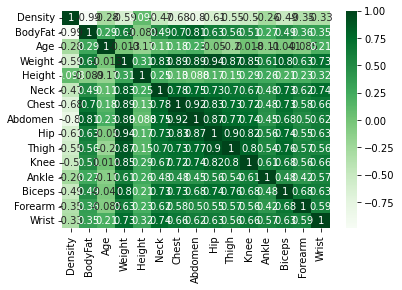

In [52]:
sns.heatmap(df_bodyFat.corr(), annot=True, cmap="Greens")

In [53]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [54]:
model.fit(X_train, Y_train)

LinearRegression()

In [55]:
Y_test

158    1.0704
83     1.0377
170    1.0926
101    1.0524
150    1.0776
199    1.0462
118    1.0404
227    1.0418
63     1.0403
135    1.0374
149    1.0416
232    1.0636
109    1.0500
188    1.0520
153    1.0610
73     1.0680
205    1.0610
171    1.0983
157    1.0761
97     1.0730
187    1.0524
45     1.0670
239    1.0316
138    1.0481
110    1.0538
251    1.0271
8      1.0900
55     1.0473
196    1.0488
37     1.0346
246    1.0308
126    1.0373
111    1.0355
182    1.0725
168    1.0180
145    1.0664
186    1.0453
5      1.0502
22     1.0631
190    1.0728
125    1.0587
12     1.0513
204    1.0209
178    1.0477
90     1.0520
129    1.0648
238    1.0705
44     1.0814
64     1.0264
181    1.1089
71     1.0788
Name: Density, dtype: float64

In [56]:
Y_pred = model.predict(X_test)

In [57]:
finaldf = pd.DataFrame({"Actual": Y_test, "Predicted":Y_pred})

In [58]:
from sklearn.metrics import r2_score

In [59]:
r2_score(Y_test, Y_pred)

0.9904728615490388